# Homework 5. Pandas - Titanic

## IMPORTANT: 
- Do NOT use numpy or matplotlib functions. Use Pandas functions. 
- Remember we are praticing pandas!

In [1]:
import pandas as pd

In [2]:
titanic = pd.read_csv('titanic_dataset.csv')

## Problem 1. Find mean fare that the first class passengers paid (In Korean current currency) (5 pts)
- Note that there are many unpaid free passengers. **Do NOT take unpaid free passengers into consideration.**
- 1 pound when Titanic launched is worth 57.5 US dollars. 
- Suppose US currency exchange ratio is 1230 won per dollar.

In [3]:
# YOUR CODE HERE
pound=titanic['fare'][titanic.pclass==1][titanic.fare!=0].mean()
won=pound*57.5*1230
print("mean fare the first class passengers paid =",format(won,".2f"))

mean fare the first class passengers paid = 6326173.16


```
mean fare that the first class passengers paid = 6326173.16
```

## Problem 2. (15 pts)
### 2.1 Find the **name**s who paid the highest **fare**. Are they **survived**?

In [4]:
# YOUR CODE HERE
max_fare=titanic.fare.max()
rich=titanic[['name','survived']][titanic.fare==max_fare]
print(rich)

                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1


```
                                                  name  survived
49                  Cardeza, Mr. Thomas Drake Martinez         1
50   Cardeza, Mrs. James Warburton Martinez (Charlo...         1
183                             Lesurer, Mr. Gustave J         1
302                                   Ward, Miss. Anna         1
```

### 2.2 Find the **name**s who paid the lowest **fare**. Are they **survived**?

In [5]:
# YOUR CODE HERE
min_fare=titanic.fare.min()
people=titanic[titanic.fare==min_fare][['name','pclass','survived']]
print(people)

                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963     

```
                                       name  pclass  survived
7                    Andrews, Mr. Thomas Jr       1         0
70    Chisholm, Mr. Roderick Robert Crispin       1         0
125                        Fry, Mr. Richard       1         0
150                   Harrison, Mr. William       1         0
170                 Ismay, Mr. Joseph Bruce       1         1
223           Parr, Mr. William Henry Marsh       1         0
234         Reuchlin, Jonkheer. John George       1         0
363                   Campbell, Mr. William       2         0
384          Cunningham, Mr. Alfred Fleming       2         0
410        Frost, Mr. Anthony Wood "Archie"       2         0
473                    Knight, Mr. Robert J       2         0
528             Parkes, Mr. Francis "Frank"       2         0
581              Watson, Mr. Ennis Hastings       2         0
896                     Johnson, Mr. Alfred       3         0
898         Johnson, Mr. William Cahoone Jr       3         0
963                     Leonard, Mr. Lionel       3         0
1254           Tornquist, Mr. William Henry       3         1
```

### 2.3 Find the **name**s who paid the lowest **fare** (> 0). Are they **survived**?

In [6]:
# YOUR CODE HERE
min_fare=titanic.fare[titanic.fare!=0].min()
people=titanic[titanic.fare==min_fare][['name','pclass','survived']]
print(people)

                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1


```
                           name  pclass  survived
1082  Olsen, Master. Artur Karl       3         1
```

## Problem 3. (10 pts)
### 3.1 Find the survival ratio who paid more than 0 and less than or equal to the mean fare of third class

In [7]:
# YOUR CODE HERE
avg_fare=titanic.fare[titanic.pclass==3][titanic.fare!=0].mean()
x=titanic.name[titanic.fare!=0][titanic.fare<=avg_fare].size
y=titanic.name[titanic.fare!=0][titanic.fare<=avg_fare][titanic.survived==1].size # survived
ratio=y/x
print("survived ratio of low 1 group =",format(ratio,".2%"))

survived ratio of low 1 group = 25.33%


```
survived ratio of low 1 group = 25.33%
```

### 3.2 Find the survival ratio who paid more than the mean fare of first class

In [8]:
# YOUR CODE HERE
avg_fare=titanic.fare[titanic.pclass==1].mean()
n=titanic[titanic.fare>avg_fare]
x,_=n.shape
survivor=n[n.survived==1]
y,_=survivor.shape
ratio=y/x
print("survived ratio of high 1 group =",format(ratio,".2%"))

survived ratio of high 1 group = 72.16%


```
survived ratio of high 1 group = 72.16%
```

## Problem 4. (10 pts)
### 4.1 Plot the number of male and female passengers

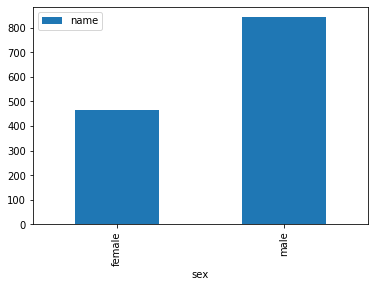

In [9]:
# YOUR CODE HERE
%matplotlib inline
from pandas import DataFrame
import matplotlib.pyplot as plt
x=titanic.name[titanic.sex=='female'].size
y=titanic.name[titanic.sex=='male'].size
name={'name': [x,y]}
d=DataFrame(name,index=['female','male'])
d.plot(kind='bar')
plt.xlabel("sex")
plt.show()

<img src="hw5_1.png">

### 4.2 Plot mean age and mean fare by sex

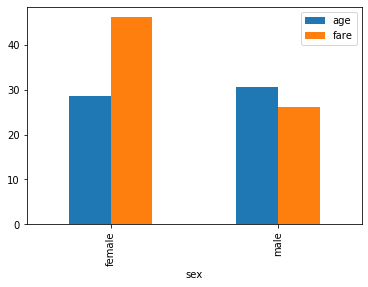

In [10]:
# YOUR CODE HERE
%matplotlib inline
from pandas import DataFrame
import matplotlib.pyplot as plt
female_age=titanic.age[titanic.sex=='female'].mean()
male_age=titanic.age[titanic.sex=='male'].mean()
female_fare=titanic.fare[titanic.sex=='female'].mean()
male_fare=titanic.fare[titanic.sex=='male'].mean()
means={'age': [female_age,male_age],
         'fare': [female_fare,male_fare]}
plotData=DataFrame(means,index=['female','male'])
plotData.plot(kind='bar')
plt.xlabel("sex")
plt.show()

<img src="hw5_2.png">

## Problem 5. (10 pts)
### 5.1 Find the number of passengers by passenger's title.

In [11]:
# YOUR CODE HERE
from pandas import Series
import requests, re
from collections import Counter
regex=re.compile('\w+\.')
title=[]
type(titanic.name)
names=titanic.name.values
for words in names:
    temp=regex.findall(words)
    if 'L.'in temp:
        temp.remove('L.')
    title=title+temp
counter= Counter(word for word in title)
s=Series(counter).sort_values(ascending=False)#index
s.name="name"
print(s)

Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Ms.            2
Mlle.          2
Lady.          1
Sir.           1
Mme.           1
Dona.          1
Jonkheer.      1
Countess.      1
Don.           1
Capt.          1
Name: name, dtype: int64


```
 Mr.          757
 Miss.        260
 Mrs.         197
 Master.       61
 Rev.           8
 Dr.            8
 Col.           4
 Ms.            2
 Mlle.          2
 Major.         2
 Jonkheer.      1
 Sir.           1
 Capt.          1
 Countess.      1
 Lady.          1
 Don.           1
 Mme.           1
 Dona.          1
Name: name, dtype: int64
```

### 5.2 Plot the mean fare by passenger's title

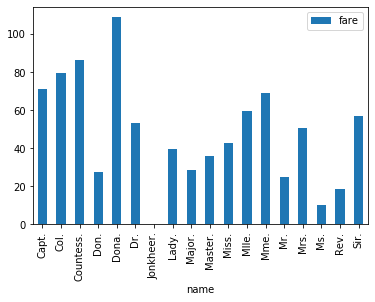

In [12]:
# YOUR CODE HERE
mean_fare_title=[]
titanic['title']=title
titanic
sorted_titles=sorted(counter)
for sorted_title in sorted_titles:
    mean_fare_title.append(titanic.fare[titanic.title==sorted_title].mean())
mean_fare={'fare':mean_fare_title}
d=DataFrame(mean_fare,index=sorted_titles)
d.plot(kind='bar')
plt.xlabel("name")
plt.show()

<img src="hw5_3.png">

## Problem 6. (15 pts)
### Compute the confidence and support for the following cases:
- Print probability in percent format and truncate all probability values to 2 decimal places

Confidences:
- P(survived = 1 | sex=female, pclass=1)
- P(survived = 1 | sex=female, pclass=2)
- P(survived = 1 | sex=female, pclass=3)
- P(survived = 1 | sex=male, pclass=1)
- P(survived = 1 | sex=male, pclass=2)
- P(survived = 1 | sex=male, pclass=3)
- P(survived = 1 | age <= 10, pclass=1)
- P(survived = 1 | age <= 10, pclass=2)
- P(survived = 1 | age <= 10, pclass=3)

Support:
- P(survived = 1, sex=female, pclass=1)
- P(survived = 1, sex=female, pclass=2)
- P(survived = 1, sex=female, pclass=3)
- P(survived = 1, sex=male, pclass=1)
- P(survived = 1, sex=male, pclass=2)
- P(survived = 1, sex=male, pclass=3)
- P(survived = 1, age <= 10, pclass=1)
- P(survived = 1, age <= 10, pclass=2)
- P(survived = 1, age <= 10, pclass=3)

### 6.1 P(survived = 1 | sex=female, pclass=1), P(survived = 1, sex=female, pclass=1)

In [13]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.sex=='female') & (titanic.pclass==1)].size
x1=titanic.name.size
x2=titanic.name[(titanic.sex=='female') & (titanic.pclass==1)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | sex=female, pclass=1) =",format(confidences,".2f"))
print("Support: P(survived = 1, sex=female, pclass=1) =",format(support,".2f"))

Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53
Support: P(survived = 1, sex=female, pclass=1) = 10.62


```
Confidence: P(survived = 1 | sex=female, pclass=1) = 96.53
Support: P(survived = 1, sex=female, pclass=1) = 10.62
```

### 6.2 P(survived = 1 | sex=female, pclass=2), P(survived = 1, sex=female, pclass=2)

In [14]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.sex=='female') & (titanic.pclass==2)].size
x1=titanic.name.size
x2=titanic.name[(titanic.sex=='female') & (titanic.pclass==2)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | sex=female, pclass=2) =",format(confidences,".2f"))
print("Support: P(survived = 1, sex=female, pclass=2) =",format(support,".2f"))

Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68
Support: P(survived = 1, sex=female, pclass=2) = 7.18


```
Confidence: P(survived = 1 | sex=female, pclass=2) = 88.68
Support: P(survived = 1, sex=female, pclass=2) = 7.18
```

### 6.3 P(survived = 1 | sex=female, pclass=3), P(survived = 1, sex=female, pclass=3)

In [15]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.sex=='female') & (titanic.pclass==3)].size
x1=titanic.name.size
x2=titanic.name[(titanic.sex=='female') & (titanic.pclass==3)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | sex=female, pclass=3) =",format(confidences,".2f"))
print("Support: P(survived = 1, sex=female, pclass=3) =",format(support,".2f"))

Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07
Support: P(survived = 1, sex=female, pclass=3) = 8.10


```
Confidence: P(survived = 1 | sex=female, pclass=3) = 49.07
Support: P(survived = 1, sex=female, pclass=3) = 8.10
```

### 6.4 P(survived = 1 | sex=male, pclass=1), P(survived = 1, sex=male, pclass=1)

In [16]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.sex=='male') & (titanic.pclass==1)].size
x1=titanic.name.size
x2=titanic.name[(titanic.sex=='male') & (titanic.pclass==1)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | sex=male, pclass=1) =",format(confidences,".2f"))
print("Support: P(survived = 1, sex=male, pclass=1) =",format(support,".2f"))

Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08
Support: P(survived = 1, sex=male, pclass=1) = 4.66


```
Confidence: P(survived = 1 | sex=male, pclass=1) = 34.08
Support: P(survived = 1, sex=male, pclass=1) = 4.66
```

### 6.5 P(survived = 1 | sex=male, pclass=2), P(survived = 1, sex=male, pclass=2)

In [17]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.sex=='male') & (titanic.pclass==2)].size
x1=titanic.name.size
x2=titanic.name[(titanic.sex=='male') & (titanic.pclass==2)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | sex=male, pclass=2) =",format(confidences,".2f"))
print("Support: P(survived = 1, sex=male, pclass=2) =",format(support,".2f"))

Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62
Support: P(survived = 1, sex=male, pclass=2) = 1.91


```
Confidence: P(survived = 1 | sex=male, pclass=2) = 14.62
Support: P(survived = 1, sex=male, pclass=2) = 1.91
```

### 6.6 P(survived = 1 | sex=male, pclass=3), P(survived = 1, sex=male, pclass=3)

In [18]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.sex=='male') & (titanic.pclass==3)].size
x1=titanic.name.size
x2=titanic.name[(titanic.sex=='male') & (titanic.pclass==3)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | sex=male, pclass=3) =",format(confidences,".2f"))
print("Support: P(survived = 1, sex=male, pclass=3) =",format(support,".2f"))

Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21
Support: P(survived = 1, sex=male, pclass=3) = 5.73


```
Confidence: P(survived = 1 | sex=male, pclass=3) = 15.21
Support: P(survived = 1, sex=male, pclass=3) = 5.73
```

### 6.7 P(survived = 1 | age <= 10, pclass=1), P(survived = 1, age <= 10, pclass=1)

In [19]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.age<=10) & (titanic.pclass==1)].size
x1=titanic.name.size
x2=titanic.name[(titanic.age<=10) & (titanic.pclass==1)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | age <= 10, pclass=1) =",format(confidences,".2f"))
print("Support: P(survived = 1, age <= 10, pclass=1) =",format(support,".2f"))

Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00
Support: P(survived = 1, age <= 10, pclass=1) = 0.23


```
Confidence: P(survived = 1 | age <= 10, pclass=1) = 75.00
Support: P(survived = 1, age <= 10, pclass=1) = 0.23
```

### 6.8 P(survived = 1 | age <= 10, pclass=2), P(survived = 1, age <= 10, pclass=2)

In [20]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.age<=10) & (titanic.pclass==2)].size
x1=titanic.name.size
x2=titanic.name[(titanic.age<=10) & (titanic.pclass==2)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | age <= 10, pclass=2) =",format(confidences,".2f"))
print("Support: P(survived = 1, age <= 10, pclass=2) =",format(support,".2f"))

Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00
Support: P(survived = 1, age <= 10, pclass=2) = 1.68


```
Confidence: P(survived = 1 | age <= 10, pclass=2) = 100.00
Support: P(survived = 1, age <= 10, pclass=2) = 1.68
```

### 6.9 P(survived = 1 | age <= 10, pclass=3), P(survived = 1, age <= 10, pclass=3)

In [21]:
# YOUR CODE HERE
y1=titanic.name[(titanic.survived==1) & (titanic.age<=10) & (titanic.pclass==3)].size
x1=titanic.name.size
x2=titanic.name[(titanic.age<=10) & (titanic.pclass==3)].size
confidences=100*y1/x2
support=100*y1/x1
print("Confidence: P(survived = 1 | age <= 10, pclass=3) =",format(confidences,".2f"))
print("Support: P(survived = 1, age <= 10, pclass=3) =",format(support,".2f"))

Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67
Support: P(survived = 1, age <= 10, pclass=3) = 1.91


```
Confidence: P(survived = 1 | age <= 10, pclass=3) = 41.67
Support: P(survived = 1, age <= 10, pclass=3) = 1.91
```

### 6.10 Discussion

- Discuss what you learned from this analysis
- WRITE HERE (To edit, double click this cell)



## Problem 7. (10 pts)
### 7.1 Plot numbers of survived and numbers of dead by passenger classes

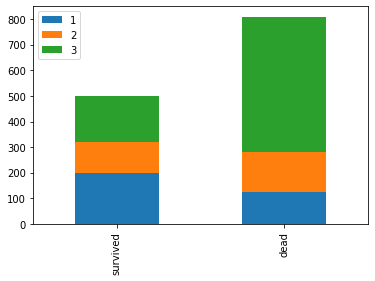

In [22]:
# YOUR CODE HERE
import numpy as np
surv_dead=[]

xs=['survived','dead']
for i in range(3):
    x=titanic.name[(titanic.survived==1) & (titanic.pclass==i+1)].size 
    y=titanic.name[(titanic.survived==0) & (titanic.pclass==i+1)].size
    surv_dead.append((x,y))
df=DataFrame(surv_dead,columns=xs,index=[1,2,3])
df2=df.T
df2.plot.bar(stacked=True)

<img src="hw5_4.png">

### 7.2 Plot numbers of survived and numbers of dead by passenger age intervals
-  0:   0 $\le$ age $\lt$ 20
- 20: 20 $\le$ age $\lt$ 40
- 40: 40 $\le$ age $\lt$ 60
- 60: 60 $\le$ age $\lt$ 80
- 80: 80 $\le$ age

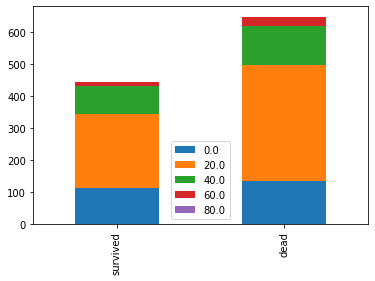

In [23]:
# YOUR CODE HERE
import numpy as np
surv_dead=[]
xs=['survived','dead']
for i in range(5):
    x=titanic.name[(titanic.survived==1) & (titanic.age>=i*20.0)& (titanic.age<=(i+1)*20.0)].size
    y=titanic.name[(titanic.survived==0) & (titanic.age>=i*20.0)& (titanic.age<=(i+1)*20.0)].size
    surv_dead.append((x,y))
df=DataFrame(surv_dead,columns=xs,index=[0.0,20.0,40.0,60.0,80.0])
df2=df.T
df2.plot.bar(stacked=True)

<img src="hw5_5.png">

### 7.3 Plot numbers of survived and numbers of dead by the ports passenger embarked at

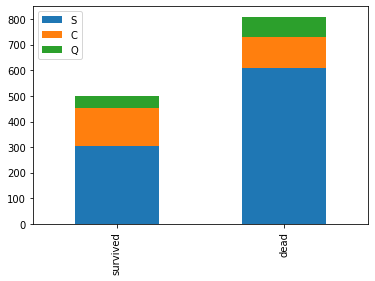

In [24]:
# YOUR CODE HERE
# YOUR CODE HERE
import numpy as np
surv_dead=[]
xs=['survived','dead']

x=titanic.name[(titanic.survived==1) & (titanic.embarked=='S')].size 
y=titanic.name[(titanic.survived==0) & (titanic.embarked=='S')].size
surv_dead.append((x,y))
x=titanic.name[(titanic.survived==1) & (titanic.embarked=='C')].size 
y=titanic.name[(titanic.survived==0) & (titanic.embarked=='C')].size
surv_dead.append((x,y))
x=titanic.name[(titanic.survived==1) & (titanic.embarked=='Q')].size 
y=titanic.name[(titanic.survived==0) & (titanic.embarked=='Q')].size
surv_dead.append((x,y))
df=DataFrame(surv_dead,columns=xs,index=['S','C','Q'])
df2=df.T
df2.plot.bar(stacked=True)

<img src="hw5_6.png">